In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras.models import Model


Load and Preprocess the MNIST Dataset


In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # (num_samples, height, width, channels)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


Build the Convolutional Autoencoder Model

In [3]:
# Define the size of the input layer
input_shape = (28, 28, 1)

# Build the encoder
input_layer = Input(shape=input_shape)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

# Build the decoder
decoded = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(decoded)

# Compile the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Train the Convolutional Autoencoder

In [5]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - loss: 0.0634 - val_loss: 0.0617
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 150ms/step - loss: 0.0619 - val_loss: 0.0609
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - loss: 0.0611 - val_loss: 0.0604
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 184ms/step - loss: 0.0605 - val_loss: 0.0598
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - loss: 0.0599 - val_loss: 0.0595
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - loss: 0.0597 - val_loss: 0.0593
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 186ms/step - loss: 0.0596 - val_loss: 0.0592
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - loss: 0.0593 - val_loss: 0.0591
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - loss: 0.0592 - val_loss: 0.0589
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - loss: 0.0592 - val_loss: 0.0589


Evaluate the Convolutional Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


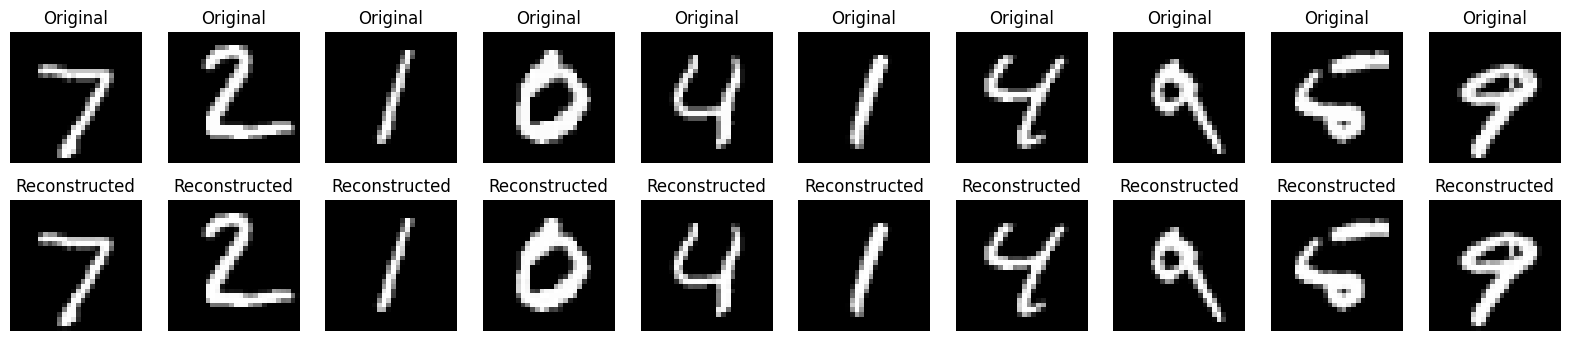

In [6]:
# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
